In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Check for missing values and null values

In [ ]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Now x , y and z are dimensions of the diamond , and we can see that minimum values of x , y and z are 0 , so it is not practical .

In [ ]:
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53920 non-null  int64  
 1   carat       53920 non-null  float64
 2   cut         53920 non-null  object 
 3   color       53920 non-null  object 
 4   clarity     53920 non-null  object 
 5   depth       53920 non-null  float64
 6   table       53920 non-null  float64
 7   price       53920 non-null  int64  
 8   x           53920 non-null  float64
 9   y           53920 non-null  float64
 10  z           53920 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


To see the dependecy of features we will create a pair plot

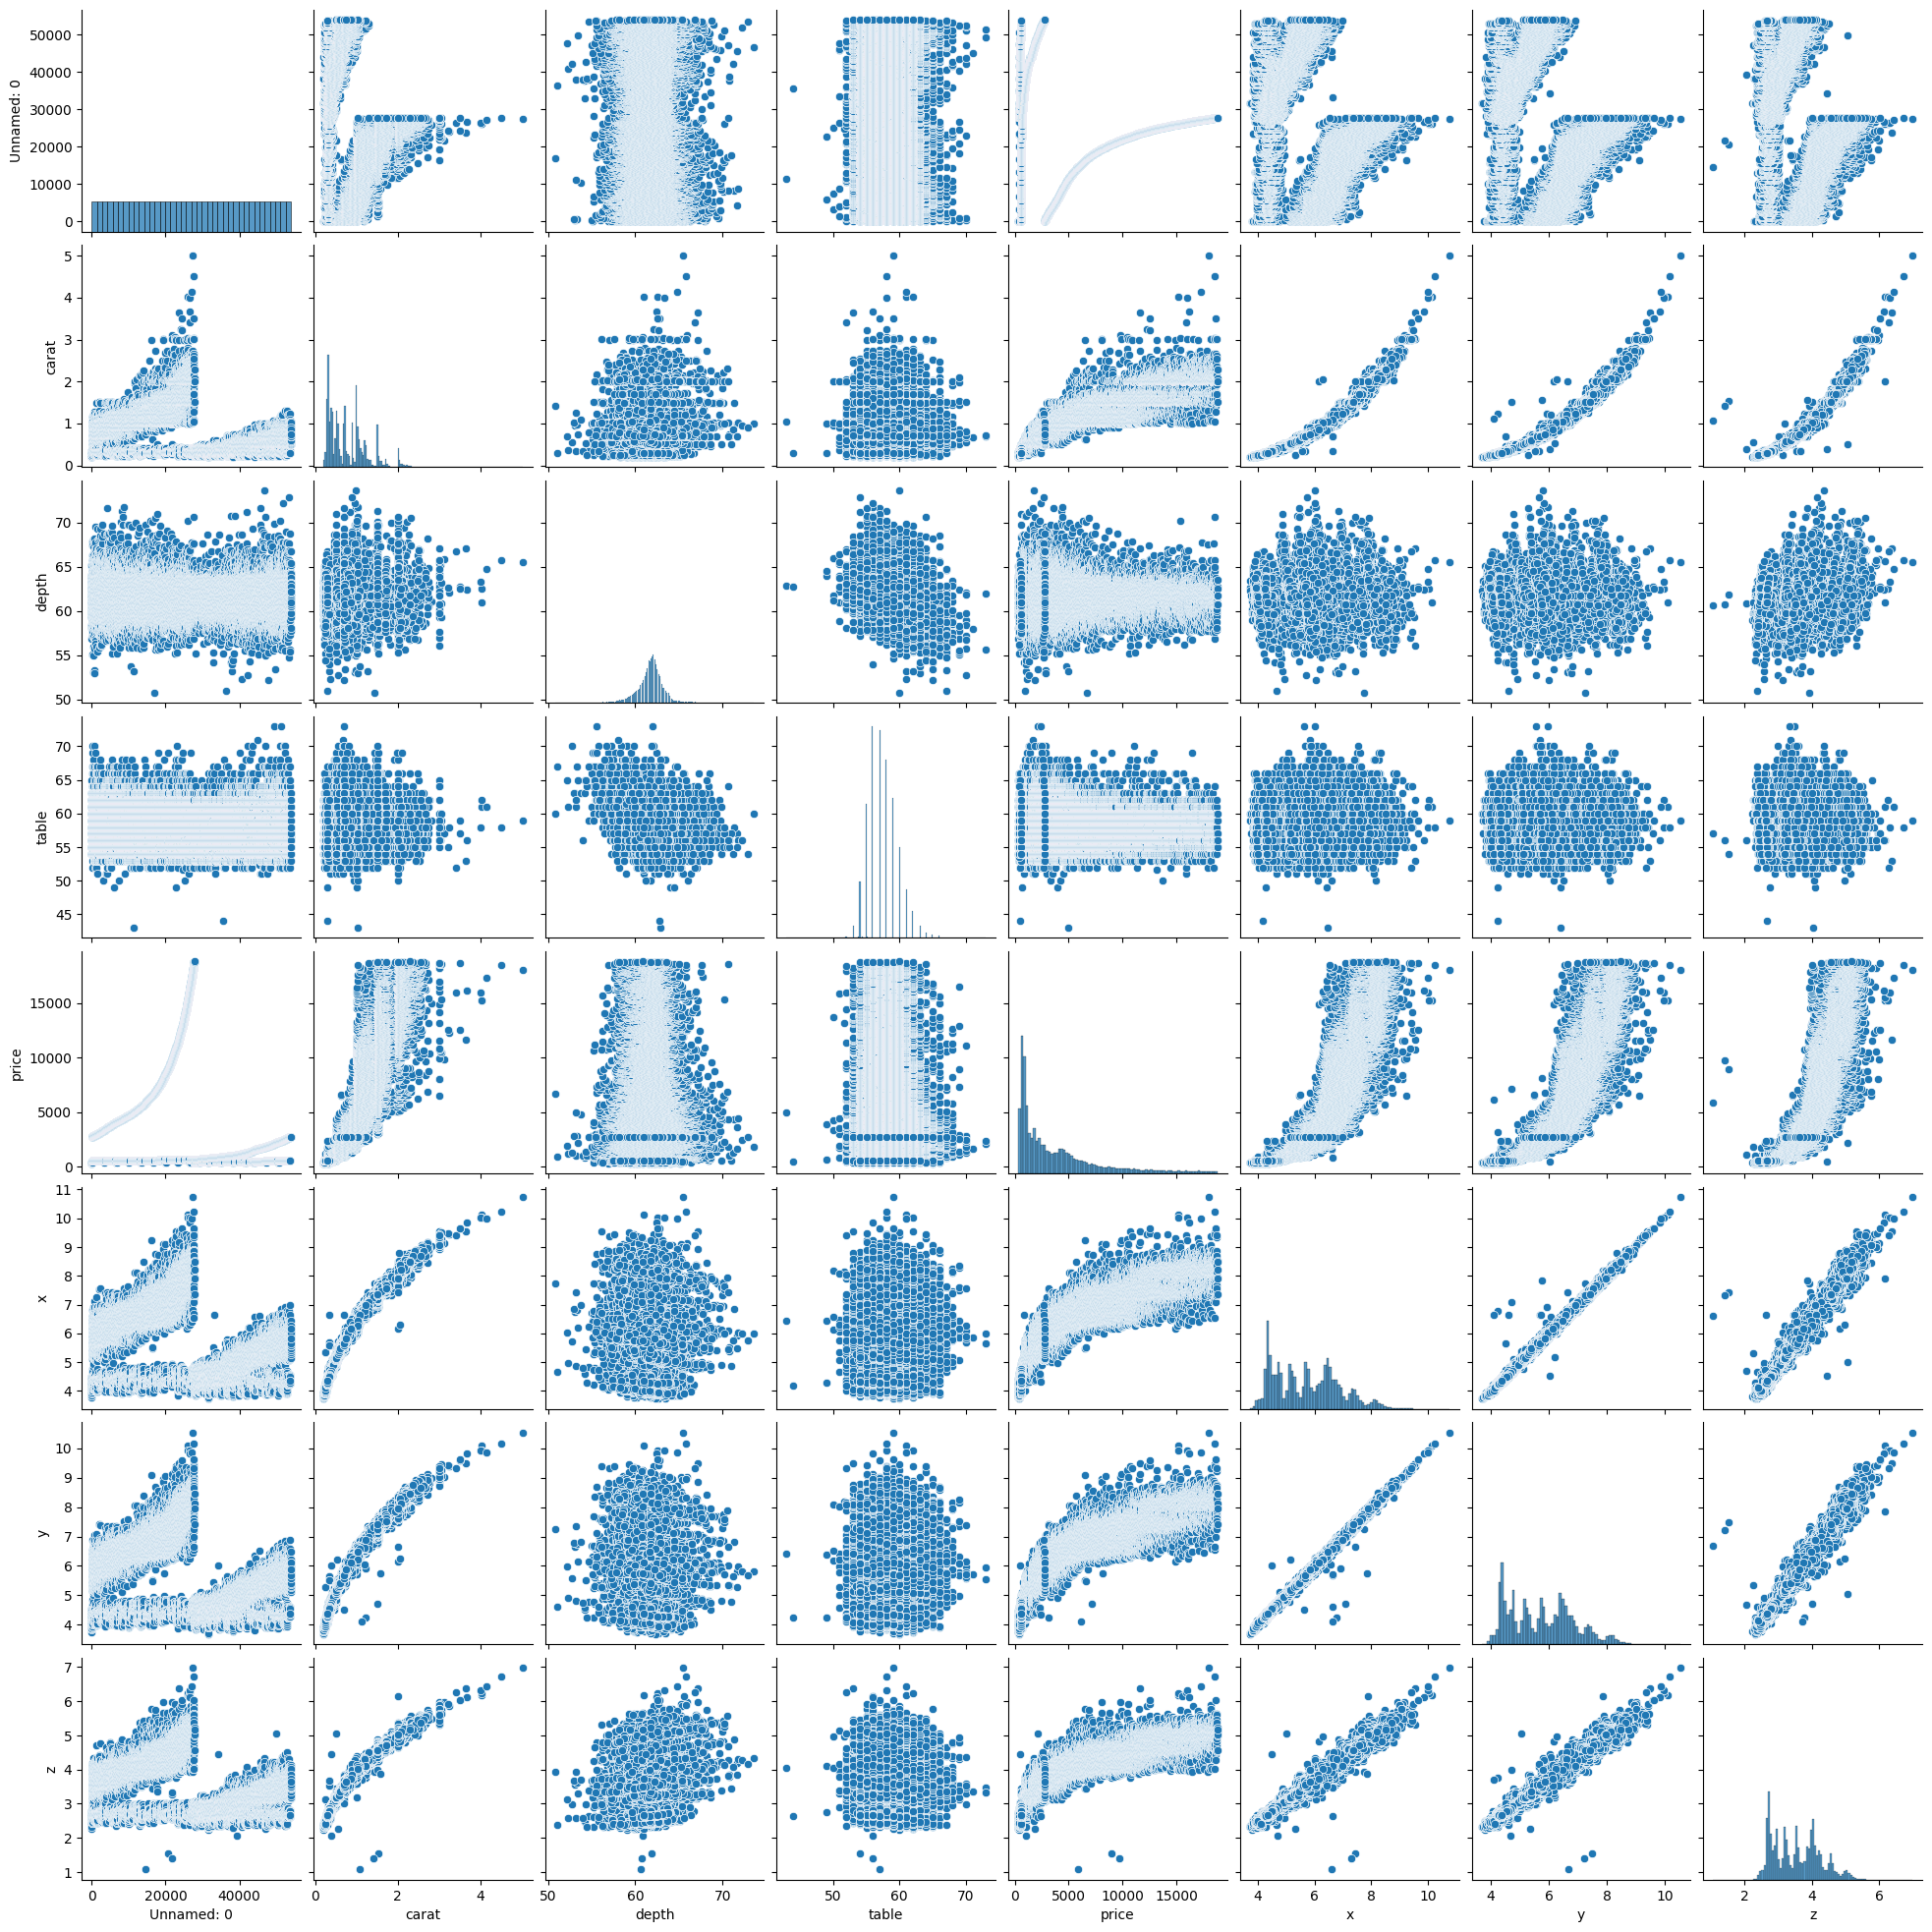

In [ ]:
sn.pairplot(df)

Outlier detection and filtering the data

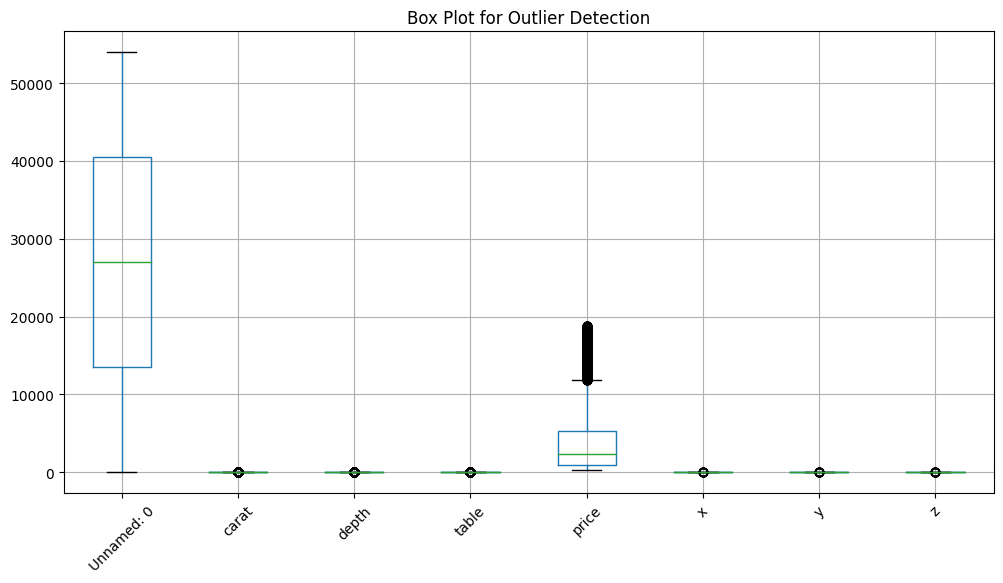

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

Analyse x, y , z columns for outliers

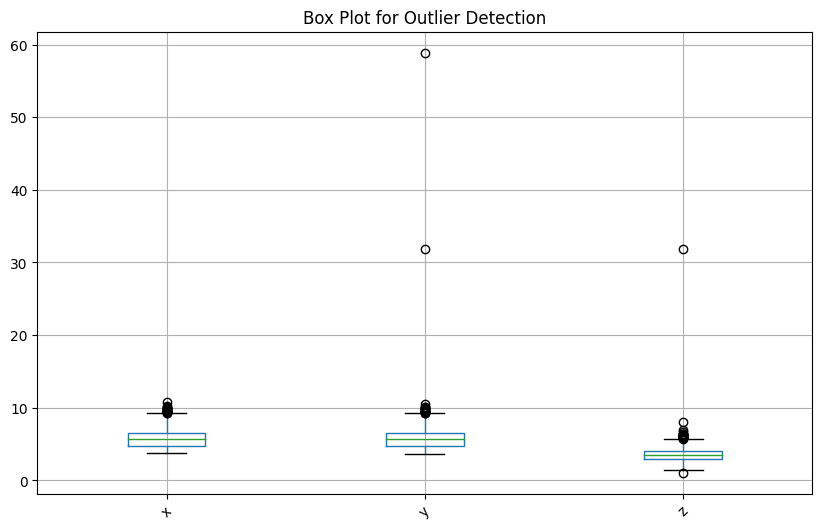

In [ ]:
plt.figure(figsize=(10, 6))
sub_df = df[['x', 'y', 'z']]
sub_df.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

Carat , depth and table for outlier detection

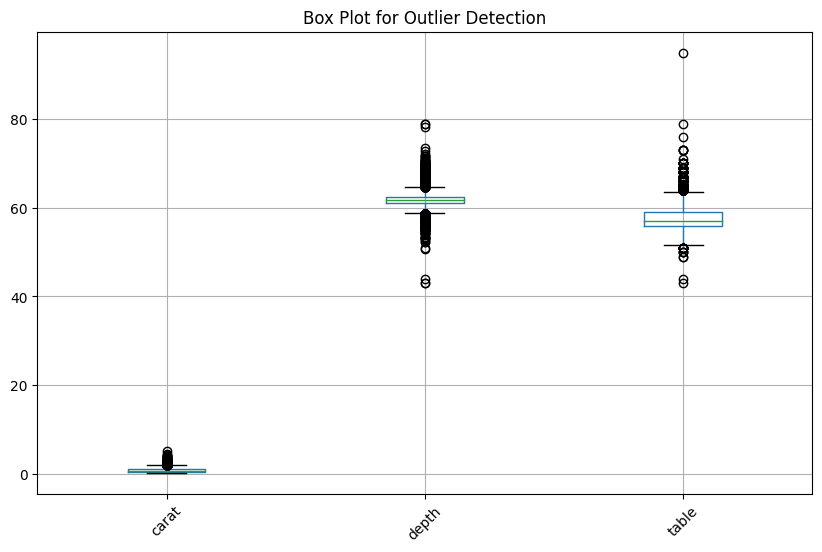

In [ ]:
plt.figure(figsize=(10, 6))
sub_df = df[['carat', 'depth', 'table']]
sub_df.boxplot()
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

Removing outliers

In [ ]:

df = df[(df['y'] < 30) & (df['y'] > 0)]
df = df[(df['z'] < 30) & (df['z'] > 0)]
df = df[(df['table'] < 75) & (df['table'] > 40)]
df = df[(df['depth'] < 75) & (df['depth'] > 45)]

df.shape

(53908, 11)

Dealing with categorical data

In [ ]:
print(df.color.unique())
print(df.cut.unique())
print(df.clarity.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
df_cat = df.copy()

Making them numerical for training purposes

In [ ]:
category = ['color', 'cut', 'clarity']

for i in category:
    df_cat[i+"_num"] = pd.factorize(df_cat[i])[0]
    df_cat.drop(i, axis = 1, inplace = True)


In [ ]:
df_cat.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_num,cut_num,clarity_num
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


In [ ]:
df_cat.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_num,cut_num,clarity_num
count,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000,53908.000000
mean,26970.613286,0.797658,61.749507,57.455105,3930.881984,5.731553,5.733390,3.539321,3.174278,1.228519,2.256288
std,15570.086034,0.473780,1.419715,2.222823,3987.300959,1.119422,1.111288,0.691623,2.050287,1.265722,1.766369
min,1.000000,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,1.000000,0.000000,1.000000
50%,26972.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,4.000000,1.000000,2.000000
75%,40453.250000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,5.000000,3.000000,3.000000
max,53940.000000,5.010000,73.600000,73.000000,18823.000000,10.740000,10.540000,6.980000,6.000000,4.000000,7.000000


Correlation check by making a heatmap  

<Axes: >

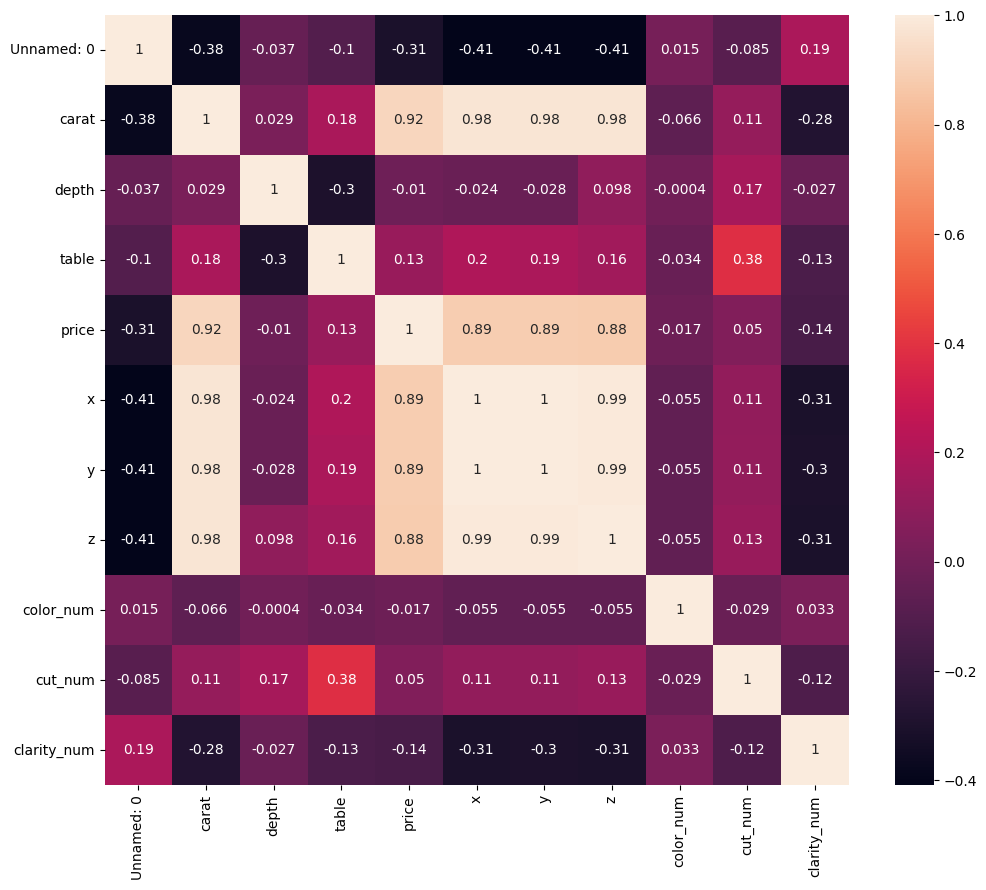

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))
sn.heatmap(df_cat.corr(), annot = True)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_cat.head()

,carat,depth,table,price,x,y,z,color_num,cut_num,clarity_num
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


Applying regression models for predictions

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
X = df_cat.drop('price', axis = 1)
y = df_cat['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_reg', LinearRegression())
])

#KNN
knn_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('knn_reg', KNeighborsRegressor())
])

#XGB
xgb_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('xgb_reg', XGBRegressor())
])

#Decision Tree
dt_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('dt_reg', DecisionTreeRegressor())
])

#Random Forest
rf_pipeline = Pipeline([
    ('scaler_5', StandardScaler()),
    ('rf_reg', RandomForestRegressor())
])

pipelines = [lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline]
models = ['Linear Regression', 'KNN', 'XGB', 'Decision Tree', 'Random Forest']

In [ ]:
for i in pipelines:
    i.fit(X_train, y_train)

In [ ]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1406.632926 
KNN: -852.704316 
XGB: -552.042859 
Decision Tree: -764.137651 
Random Forest: -558.861627 


In [ ]:
pred = xgb_pipeline.predict(X_test)

In [ ]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("R²:",metrics.r2_score(y_test, pred))

RMSE: 566.5647145817812
MAE: 287.4367337092064
R²: 0.9788668157286843
